Dataset : Uber and Lyft Dataset Boston, MA

Objective : predict ride-hailing platform trip prices with the provided dataset.

# 2. Import Libraries

In [1]:
# !pip install feature-engine

In [2]:
# !pip install category_encoders

In [3]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from feature_engine.outliers import Winsorizer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
import joblib
import json


import scipy.stats as stats

sns.set()

In [4]:
pd.set_option('display.max_columns', None)

# 3. Data Loading

In [5]:
# Load dataset and make it a backup file

data_bak = pd.read_csv('rideshare_kaggle.csv')

In [6]:
# duplicate data for use
data = data_bak.copy()

In [7]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [8]:
# view how many data
data.shape[0]

693071

In [9]:
# view all features
data.columns.values.tolist()

['id',
 'timestamp',
 'hour',
 'day',
 'month',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'short_summary',
 'long_summary',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'icon',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

# 4. Exploratory Data Analysis (EDA)

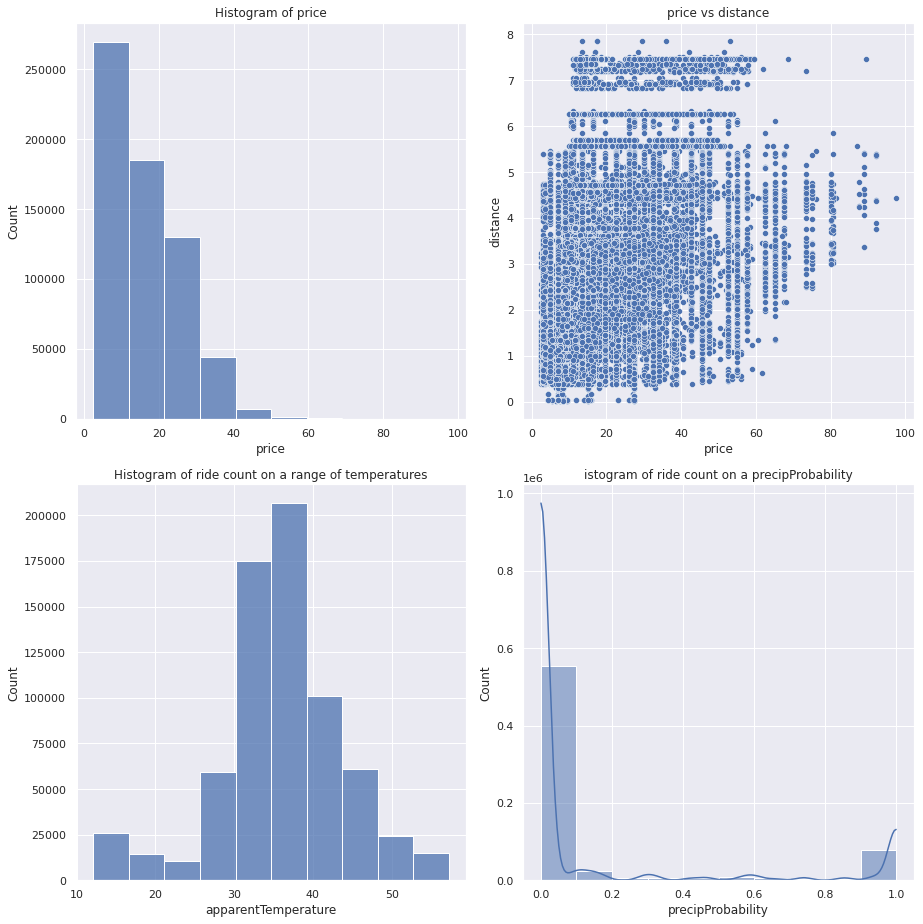

In [10]:
# Create Plot

plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
sns.histplot(data['price'], bins=10)
plt.title('Histogram of price')

plt.subplot(2,2,2)
sns.scatterplot(x='price', y='distance', data=data)
plt.title('price vs distance')

plt.subplot(2,2,3)
sns.histplot(data['apparentTemperature'], bins=10)
plt.title('Histogram of ride count on a range of temperatures')

plt.subplot(2,2,4)
sns.histplot(data['precipProbability'], bins=10, kde=True)
plt.title('istogram of ride count on a precipProbability')


plt.tight_layout()
plt.show()

From the chart above, we can see most people uses ride hailing app, when it cost them less than $40.
people also use the service on a feelslike temperature(apparentTemperature) between 25 and 50 degrees fahrenheit.

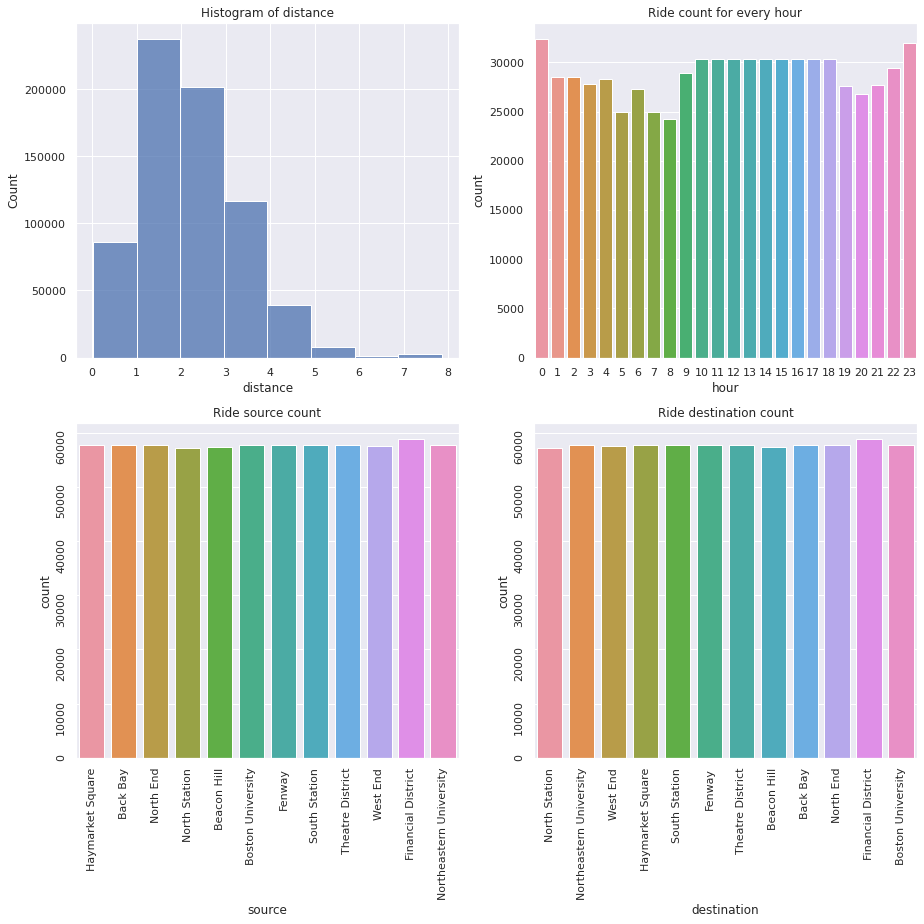

In [11]:
# Create another Plot

plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
sns.histplot(data['distance'], bins=8)
plt.title('Histogram of distance')

plt.subplot(2,2,2)
sns.countplot(data=data, x='hour')
plt.title('Ride count for every hour')

plt.subplot(2,2,3)
sns.countplot(data=data, x='source')
plt.tick_params(labelrotation=90)
plt.title('Ride source count')

plt.subplot(2,2,4)
sns.countplot(data=data, x='destination')
plt.tick_params(labelrotation=90)
plt.title('Ride destination count')


plt.tight_layout()
plt.show()

From the chart above, we can see most people uses ride hailing app, when the distance is 1 to 4 miles.
from the ride count every hour, we can see the maximum count of ride is late night between 22pm to 1 am. it seem people use ride app when public transport is less available and not safe like midnight. Weirdly enough on rush hour, people use ride app the least, it could be because public transport is cheaper and accesible on that hour.

In [12]:
# view how many data per ride app
data['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [13]:
# view mean per ride app
data.groupby(['cab_type'])['price'].mean()

cab_type
Lyft    17.351396
Uber    15.795343
Name: price, dtype: float64

In [14]:
# view median per ride app
data.groupby(['cab_type'])['price'].median()

cab_type
Lyft    16.5
Uber    12.5
Name: price, dtype: float64

# 5. Data Preprocessing

In [15]:
# count how many inference data that want to be taken out
inf_count =  round(data.shape[0]*0.05)
inf_count

34654

In [16]:
# Get Data for model inference
data_inf = data.sample(inf_count, random_state=33)

In [17]:
data_inf.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
509450,e7f794c5-f865-4a5e-acb1-fcbafe08c775,1.543333e+09,15,27,11,2018-11-27 15:30:22,America/New_York,Haymarket Square,West End,Lyft,lyft_line,Shared,3.0,0.71,1.00,42.3519,-71.0643,40.49,34.08,Overcast,Light rain in the morning.,0.0003,0.15,0.89,10.42,14.77,1543338000,5.011,46.72,1543320000,33.65,1543399200,43.70,1543320000,29.88,1543399200,cloudy,37.50,989.46,247,1.00,1,5.011,335.7,1543319469,1543353347,0.68,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
39722,88560b57-dc98-4d46-9b5f-3559e39254ed,1.543690e+09,18,1,12,2018-12-01 18:43:00,America/New_York,Boston University,West End,Lyft,lyft_premier,Lux,38.0,3.00,1.75,42.3647,-71.0542,43.64,43.64,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.54,2.73,3.36,1543672800,9.880,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.90,1022.86,303,0.30,1,9.880,274.8,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
128947,f3fce567-6105-4ff1-a706-8869fc7b47fe,1.543600e+09,17,30,11,2018-11-30 17:43:05,America/New_York,North Station,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0.90,1.00,42.2148,-71.0330,41.46,39.41,Mostly Cloudy,Overcast throughout the day.,0.0000,0.00,0.57,3.57,4.27,1543557600,9.928,42.13,1543600800,30.17,1543662000,40.95,1543608000,25.87,1543662000,partly-cloudy-day,27.50,1016.11,266,0.86,1,9.928,271.7,1543578835,1543612492,0.79,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
142691,c450109e-99bc-42c9-9cd1-b8c32d7774d5,1.543403e+09,11,28,11,2018-11-28 11:05:08,America/New_York,Back Bay,North End,Lyft,lyft_premier,Lux,19.5,2.40,1.00,42.3647,-71.0542,35.54,30.98,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.73,5.31,7.20,1543431600,9.933,42.61,1543438800,37.60,1543489200,36.57,1543438800,32.12,1543478400,partly-cloudy-night,27.87,991.07,270,0.76,0,9.933,345.8,1543405936,1543439716,0.72,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
247990,c9e0acc0-e635-4eb8-ad97-987566d47106,1.543316e+09,11,27,11,2018-11-27 11:00:21,America/New_York,South Station,Financial District,Lyft,lyft_lux,Lux Black,16.5,0.61,1.00,42.3647,-71.0542,46.23,43.49,Light Rain,Light rain in the morning.,0.0488,1.00,0.92,5.47,5.47,1543338000,3.564,47.11,1543320000,33.85,1543399200,44.14,1543320000,30.03,1543399200,rain,44.14,988.85,122,1.00,0,3.564,305.5,1543319468,1543353343,0.68,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000


In [18]:
# remove data inference from the main dataframe
data = data.drop(data_inf.index)
data.shape[0]

658417

### 5.1. Explore empty values

In [19]:
# sum null value
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          52400
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

the only empty values on the table is price.

In [20]:
# Percentage of empty values
data.isnull().mean()

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          0.079585
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


the percentage of the null values in price features, only 8 percent.

In [21]:
# define table with null price features
null_price_data = data[data['price'].isnull()]

In [22]:
# view data count
null_price_data.shape[0]

52400

In [23]:
# table with null price features description
null_price_data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,5.240000e+04,52400.000000,52400.000000,52400.000000,0.0,52400.000000,52400.0,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,5.240000e+04,52400.000000,52400.000000,5.240000e+04,52400.000000,5.240000e+04,52400.000000,5.240000e+04,52400.000000,5.240000e+04,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,5.240000e+04,5.240000e+04,52400.000000,52400.000000,5.240000e+04,52400.000000,5.240000e+04,52400.000000,5.240000e+04,52400.000000,5.240000e+04,52400.000000,5.240000e+04
mean,1.544046e+09,11.636069,17.751622,11.588359,NaN,2.192620,1.0,42.338243,-71.066197,39.615467,35.920872,0.009057,0.147505,0.741810,6.181312,8.462691,1.544050e+09,8.454618,45.058317,1.544051e+09,34.165152,1.544103e+09,41.633706,1.544051e+09,30.150119,1.544100e+09,31.709605,1010.094359,219.516374,0.689716,0.247805,8.454618,313.525971,1.544028e+09,1.544061e+09,0.579019,0.037366,1.544045e+09,33.478126,1.544042e+09,45.278162,1.544048e+09,29.753006,1.544049e+09,42.015814,1.544049e+09
std,6.890719e+05,6.940057,9.985415,0.492135,NaN,1.179405,0.0,0.047748,0.020293,6.731065,7.933511,0.027119,0.330706,0.138743,3.149814,5.290888,6.924997e+05,2.614558,6.007343,6.934715e+05,6.394942,6.920753e+05,7.681771,6.938648e+05,8.069189,6.925366e+05,9.149514,13.447831,99.256446,0.357245,0.472275,2.614558,27.970431,6.908736e+05,6.903979e+05,0.245038,0.055160,6.909386e+05,6.476602,6.900572e+05,5.657935,6.898631e+05,7.117264,6.870284e+05,6.957763,6.908020e+05
min,1.543204e+09,0.000000,1.000000,11.000000,NaN,0.020000,1.0,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,NaN,1.300000,1.0,42.350300,-71.081000,36.500000,31.910000,0.000000,0.000000,0.640000,3.410000,4.050000,1.543432e+09,8.325000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.500000,999.840000,124.000000,0.370000,0.000000,8.325000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543739e+09,12.000000,17.000000,12.000000,NaN,2.170000,1.0,42.351900,-71.063100,40.550000,35.920000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.876000,44.680000,1.543788e+09,34.190000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.890000,1009.250000,258.000000,0.830000,0.000000,9.876000,307.300000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,NaN,2.840000,1.0,42.364700,-71.054200,43.610000,40.150000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.970000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09,35.320000,1.544836e+09,38.560000,1021.740000,303.000000,1.000000,0.000000,9.996000,332.200000,1.544789e+09,1.

In [24]:
# view count for every uniqe values
null_price_data['source'].value_counts()

Financial District         4434
Boston University          4389
Theatre District           4378
North End                  4377
Northeastern University    4377
Fenway                     4376
West End                   4366
Back Bay                   4365
Beacon Hill                4342
Haymarket Square           4342
South Station              4338
North Station              4316
Name: source, dtype: int64

In [25]:
# view count for every uniqe values
null_price_data['destination'].value_counts()

Financial District         4440
Theatre District           4390
South Station              4378
Fenway                     4370
Northeastern University    4367
Haymarket Square           4364
Boston University          4362
North End                  4360
West End                   4357
Back Bay                   4354
Beacon Hill                4340
North Station              4318
Name: destination, dtype: int64

In [26]:
# view count for every uniqe values
null_price_data['hour'].value_counts()

23    2456
0     2417
15    2385
10    2361
11    2318
18    2306
16    2293
13    2288
14    2286
12    2263
22    2230
17    2211
9     2183
3     2160
2     2119
1     2117
4     2107
21    2078
6     2073
20    2065
19    2042
5     1904
7     1896
8     1842
Name: hour, dtype: int64

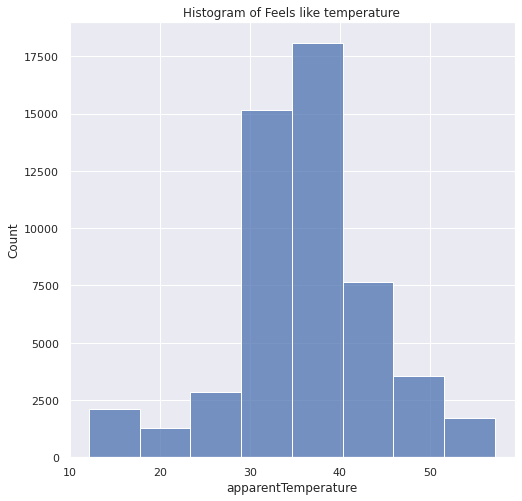

In [27]:
# view feels like temperature plot
plt.figure(figsize=(8,8))
sns.histplot(null_price_data['apparentTemperature'], bins=8)
plt.title('Histogram of Feels like temperature')

plt.show()

since there is absolutely no relation between the data missing with other features. the missing data is MCAR()

### 5.2. Split Data into train and test

In [28]:
# define features variable
X = data.drop('price', axis=1)
X

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,

In [29]:
# define features variable
y = data['price']

In [30]:
# Split between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=33)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (559654, 56)
Test Size  :  (98763, 56)


### 5.3. Handling empty values

In [31]:
# Check skewness if its not skewed, we use mean imputation, if its skewed we use median imputation.

y_train.skew()

1.0456340966849214

since its skewness more than > 1, its skewed heavily to the right. We will use median imputation.

In [32]:
# Define median price
price_median = y_train.median()
price_median

13.5

In [33]:
y_train

627565    27.5
682887    35.0
402131    16.5
592483     8.5
378090    30.0
          ... 
207047     5.0
167288     NaN
235682     7.0
414588     7.0
109624    16.5
Name: price, Length: 559654, dtype: float64

In [34]:
# Impute na values on price
y_train_na_filled = y_train.fillna(price_median)

Imputation done, using median.

In [35]:
# We can see a change in the variance after imputation

print('Variance - Orignal                 : ', y_train.std())
print('Variance - After Mean Imputation   : ', y_train_na_filled.std())

Variance - Orignal                 :  9.332193358064714
Variance - After Mean Imputation   :  8.990323224129735


<Figure size 432x288 with 0 Axes>

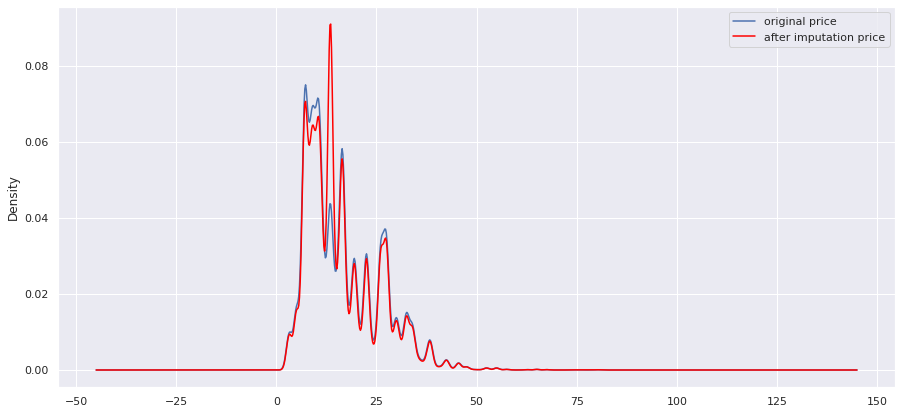

In [36]:
#Visualization Variable `price` Before and After Imputation

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

y_train.plot(kind='kde', ax=ax)
y_train_na_filled.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ['original price', 'after imputation price'], loc='best')

### 5.4. Handling Outlier

In [37]:
# Define functions for plotting outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### 5.4.1. Identify variable distribution from target

#### Outlier on target

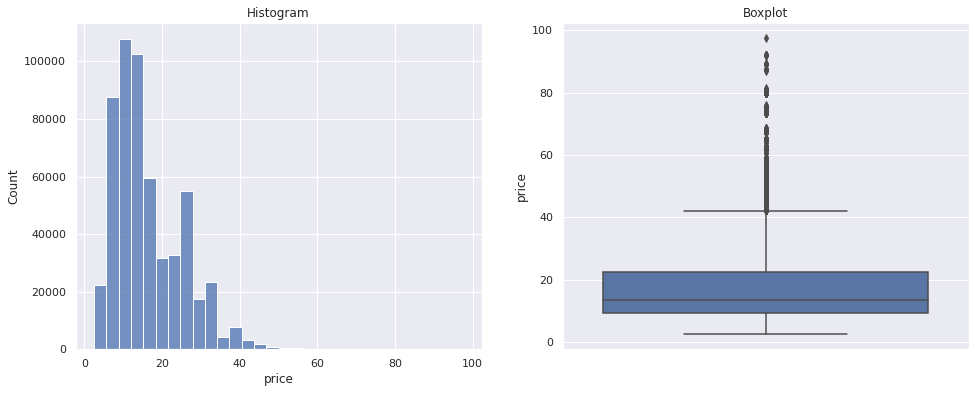

In [38]:
# Plot outlier for target

# Define figure size
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(y_train_na_filled, bins=30)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=y_train_na_filled)
plt.title('Boxplot')

plt.show()


Prices is not normally distributed, it is skewed with a tail to the right. According to the boxplot, there are some outliers at the right end of the distribution of the variable.

#### Outlier detection for skewed distribution 

In [39]:
IQR = y_train_na_filled.quantile(0.75) - y_train_na_filled.quantile(0.25)
IQR

13.0

In [40]:
# Quantile boundary
lower_boundary = y_train_na_filled.quantile(0.25) - (IQR * 1.5)
upper_boundary = y_train_na_filled.quantile(0.75) + (IQR * 1.5)

print(f'lower boundary = {lower_boundary}')
print(f'upper boundary = {upper_boundary}')

lower boundary = -10.0
upper boundary = 42.0


In [41]:
# Count price above upper bound
upper_bound_count = y_train_na_filled[y_train_na_filled > upper_boundary].count()
upper_bound_count

6441

In [42]:
# Count price below lower bound
lower_bound_count = y_train_na_filled[y_train_na_filled < lower_boundary].count()
lower_bound_count

0

In [43]:
# Percentage outlier out of all data
(upper_bound_count + lower_bound_count ) / y_train_na_filled.count() * 100


1.1508896568236804

the outlier for price is only 1.14% of the total data

#### 5.4.2. Capping targets outlier

In [44]:
# Create the capper
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['price'])

In [45]:
# Transform series to frame so it can get calculated using windsoriser
y_train_copy = y_train_na_filled.to_frame()

In [46]:
windsoriser.fit(y_train_copy)
y_train_t = windsoriser.transform(y_train_copy)

In [47]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'price': -10.0}
Right Tail Caps :  {'price': 42.0}


In [48]:
print('price Dataframe - Before Capping')
print(y_train_na_filled.describe())
print('')
print('price Dataframe - After Capping')
print(y_train_t.describe())

price Dataframe - Before Capping
count    559654.000000
mean         16.308452
std           8.990323
min           2.500000
25%           9.500000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

price Dataframe - After Capping
               price
count  559654.000000
mean       16.237952
std         8.724146
min         2.500000
25%         9.500000
50%        13.500000
75%        22.500000
max        42.000000


DIS - Before Capping


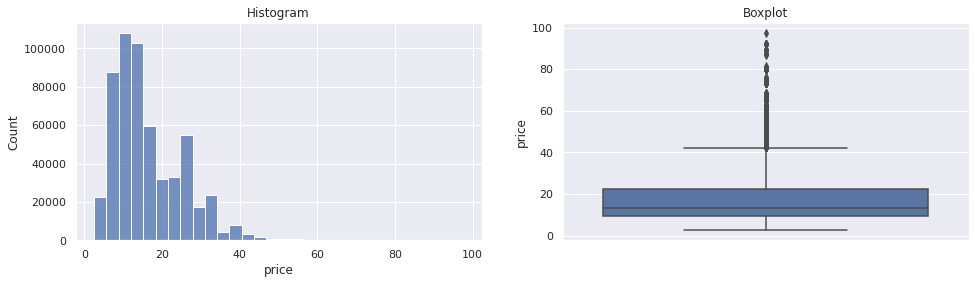


DIS - After Capping


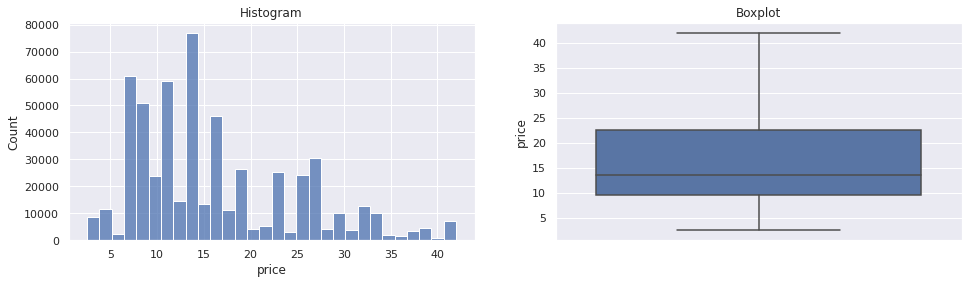

In [49]:
y_train_na_filled_2 = y_train_na_filled.to_frame()

# Review before after capping
print('DIS - Before Capping')
diagnostic_plots(y_train_na_filled_2, 'price')
print('\nDIS - After Capping')
diagnostic_plots(y_train_t, 'price')

#### 5.4.3. Identify variable distribution from 'distance' features

#### Outlier on Features

In [50]:
# Define functions for plot diagnosing outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [51]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

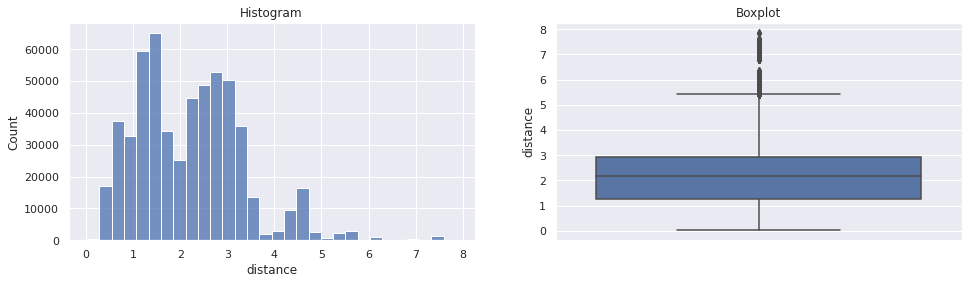

In [52]:
# plot outlier for distance

diagnostic_plots(X_train, 'distance')

In [53]:
# define upeer bound and lower bound values
upper_distance, lower_distance = find_skewed_boundaries(X_train, 'distance', 1.5)

print(f'upper bound: {upper_distance}')
print(f'lower bound: {lower_distance}')

upper bound: 5.42
lower bound: -1.2200000000000002


Since lower bound is minus, and there is no minus distance, we wont need the lower bound

In [54]:
# find outlier percentage
upper_bound_count = X_train[X_train['distance'] > upper_distance].shape[0]
upper_bound_count / X_train.shape[0] * 100

1.1060405178914114

the outlier for distance is only 1.113% of the total data

#### 5.4.4 Removing distance outlier (truncated)

In [55]:
# Drop value beyond the upper bound
X_train_cleaned = X_train[X_train['distance'] <= upper_distance]

In [56]:
# index to removed
X_train_index = X_train[X_train['distance'] > upper_distance].index

# clean targets from removed outliers 
y_train_cleaned = y_train_t.drop(index=X_train_index)
y_train_cleaned.shape[0]

553464

In [57]:
# reset index
y_train_cleaned.reset_index(inplace=True, drop = True)
y_train_cleaned

,price
0,27.5
1,35.0
2,16.5
3,8.5
4,30.0
...,...
553459,5.0
553460,13.5
553461,7.0
553462,7.0


In [58]:
# descriptive stats  before removing outlier
X_train['distance'].describe()

count    559654.000000
mean          2.188786
std           1.138696
min           0.020000
25%           1.270000
50%           2.160000
75%           2.930000
max           7.860000
Name: distance, dtype: float64

In [59]:
# descriptive stats  after removing outlier
X_train_cleaned['distance'].describe()

count    553464.000000
mean          2.143133
std           1.056280
min           0.020000
25%           1.260000
50%           2.140000
75%           2.870000
max           5.420000
Name: distance, dtype: float64

### 5.5. Feature selection

In [60]:
# find corelation between features
X_train_cor = X_train_cleaned.corr() 

<AxesSubplot:>

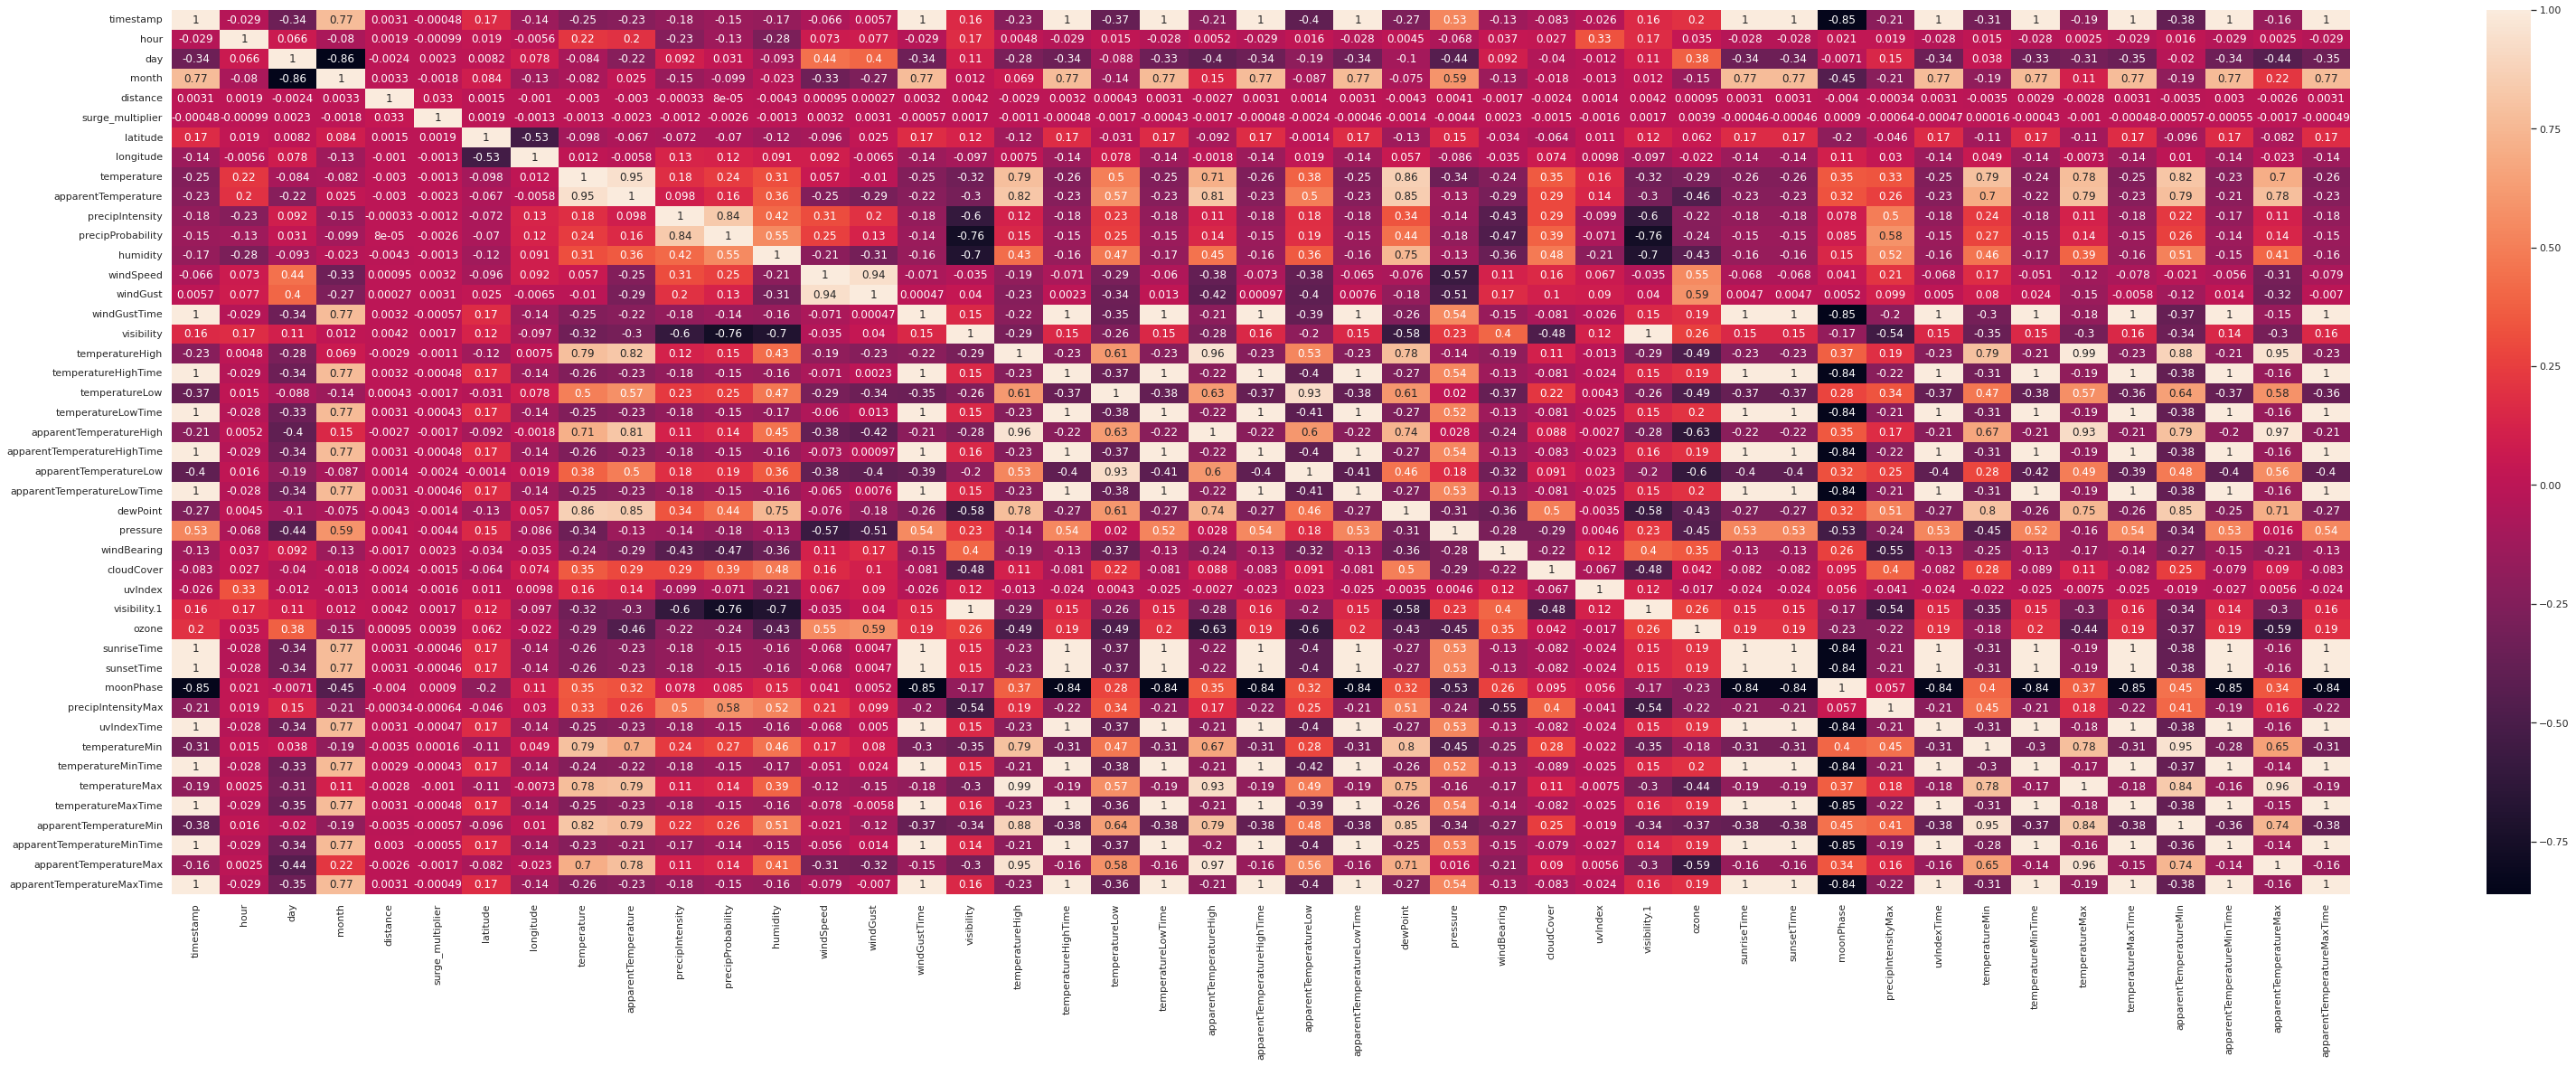

In [61]:
plt.figure(figsize=(54,18))
sns.heatmap(X_train_cor, annot=True)

From the heatmap above we can see that some of the features are highly correlated with each other. we might want to drop some of these features.

>features thats going to be kept: timestamp, hour, day, distance, surge multiplier, latitude, longitude, apparentTemperature, precipintensity, humidity, windspeed, windBearing, cloudCover, uvindex 

> plus categorical features like: cab_type

In [62]:
X_train_cleaned['precipIntensity']

627565    0.0000
682887    0.0308
402131    0.0288
592483    0.0000
378090    0.0000
           ...  
207047    0.0000
167288    0.1058
235682    0.0288
414588    0.0000
109624    0.0000
Name: precipIntensity, Length: 553464, dtype: float64

In [63]:
# make new cleaened dataframe
X_train_cleaned_2 = X_train_cleaned[['cab_type', 'timestamp', 'hour', 'day', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature', 'precipIntensity', 'humidity', 'windSpeed', 'windBearing', 'cloudCover', 'uvIndex' ]]
X_train_cleaned_2

,cab_type,timestamp,hour,day,distance,surge_multiplier,latitude,longitude,apparentTemperature,precipIntensity,humidity,windSpeed,windBearing,cloudCover,uvIndex
627565,Lyft,1.543731e+09,6,2,1.08,1.0,42.3505,-71.1054,37.96,0.0000,0.84,1.90,135,1.00,0
682887,Uber,1.543742e+09,9,2,2.98,1.0,42.3661,-71.0631,36.11,0.0308,0.93,3.53,124,1.00,0
402131,Lyft,1.543322e+09,12,27,0.71,1.0,42.3519,-71.0551,44.19,0.0288,0.91,4.54,201,1.00,0
592483,Uber,1.543685e+09,17,1,2.17,1.0,42.3505,-71.1054,41.89,0.0000,0.57,2.51,325,0.34,2
378090,Lyft,1.543496e+09,12,29,4.25,1.0,42.3644,-71.0661,32.50,0.0000,0.64,8.14,310,0.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207047,Lyft,1.543442e+09,21,28,1.35,1.0,42.3519,-71.0551,35.62,0.0000,0.60,9.29,295,1.00,0
167288,Uber,1.543278e+09,0,27,2.79,1.0,42.3661,-71.0631,39.94,0.1058,0.91,8.33,89,1.00,0
235682,Uber,1.543321e+09,12,27,0.92,1.0,42.3519,-71.0551,44.19,0.0288,0.91,4.54,201,1.00,0
414588,Uber,1.543409e+09,12,28,0.49,1.0,42.3588,-71.0707,32.06,0.0000,0.71,5.42,261,0.54,0


### 5.6. Feature scaling

#### 5.6.1 Split numerical and categorical

In [64]:
# review data types from the dataframe
X_train_cleaned_2.dtypes

cab_type                object
timestamp              float64
hour                     int64
day                      int64
distance               float64
surge_multiplier       float64
latitude               float64
longitude              float64
apparentTemperature    float64
precipIntensity        float64
humidity               float64
windSpeed              float64
windBearing              int64
cloudCover             float64
uvIndex                  int64
dtype: object

In [65]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_cleaned_2.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_cleaned_2.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['timestamp', 'hour', 'day', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature', 'precipIntensity', 'humidity', 'windSpeed', 'windBearing', 'cloudCover', 'uvIndex']
Categorical Columns :  ['cab_type']


In [66]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train_cleaned_2[num_columns]
X_train_cat = X_train_cleaned_2[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

#### 5.6.2 Scaling using MinMax

In [67]:
# analyze existing numerical data
X_train_num.describe()

,timestamp,hour,day,distance,surge_multiplier,latitude,longitude,apparentTemperature,precipIntensity,humidity,windSpeed,windBearing,cloudCover,uvIndex
count,5.534640e+05,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000,553464.000000
mean,1.544045e+09,11.625858,17.800910,2.143133,1.014035,42.338151,-71.066151,35.890787,0.008911,0.741171,6.185797,220.017768,0.686500,0.248930
std,6.891921e+05,6.948528,9.981047,1.056280,0.092244,0.047869,0.020308,7.926262,0.026880,0.138641,3.147968,99.121732,0.358548,0.474274
min,1.543204e+09,0.000000,1.000000,0.020000,1.000000,42.214800,-71.105400,12.130000,0.000000,0.380000,0.450000,2.000000,0.000000,0.000000
25%,1.543444e+09,6.000000,13.000000,1.260000,1.000000,42.350300,-71.081000,31.910000,0.000000,0.640000,3.410000,124.000000,0.370000,0.000000
50%,1.543737e+09,12.000000,17.000000,2.140000,1.000000,42.351900,-71.063100,35.920000,0.000000,0.710000,5.910000,258.000000,0.820000,0.000000
75%,1.544828e+09,18.000000,28.000000,2.870000,1.000000,42.364700,-71.054200,40.080000,0.000000,0.880000,8.410000,303.000000,1.000000,0.000000
max,1.545161e+09,23.000000,30.000000,5.420000,3.000000,42.366100,-71.033000,57.220000,0.144700,0.960000,15.000000,356.000000,1.000000,2.000000


In [68]:
# Define scaler
scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.26942942, 0.26086957, 0.03448276, ..., 0.37570621, 1.        ,
        0.        ],
       [0.27494896, 0.39130435, 0.03448276, ..., 0.34463277, 1.        ,
        0.        ],
       [0.06039149, 0.52173913, 0.89655172, ..., 0.56214689, 1.        ,
        0.        ],
       ...,
       [0.05974812, 0.52173913, 0.89655172, ..., 0.56214689, 1.        ,
        0.        ],
       [0.10478086, 0.52173913, 0.93103448, ..., 0.73163842, 0.54      ,
        0.        ],
       [0.22941644, 0.34782609, 0.        , ..., 0.85310734, 0.83      ,
        0.        ]])

### 5.7. Feature Encoding

#### 5.7.1 Encoding 'cab_type'

In [69]:
# view 'cab_type' unique values
X_train_cat['cab_type'].value_counts()

Uber    305546
Lyft    247918
Name: cab_type, dtype: int64

In [70]:
# encode cab_type using one hot encoding because there's only 2 values
# Creating instance of one_hot encoder
encoder = OneHotEncoder(sparse=False)

# perform one-hot encoding on 'cab_type' column
encoder_cab_train = pd.DataFrame(encoder.fit_transform(X_train_cat[['cab_type']]))
encoder_cab_test = pd.DataFrame(encoder.fit_transform(X_test_cat[['cab_type']]))


In [71]:
# find out which one is lyft and uber by check the number of data
encoder_cab_train

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
553459,1.0,0.0
553460,0.0,1.0
553461,0.0,1.0
553462,0.0,1.0


In [72]:
# rename encoded columns
encoder_cab_train.columns = ['Lyft','Uber']
encoder_cab_test.columns = ['Lyft','Uber']
encoder_cab_train.reset_index(inplace=True, drop = True)
encoder_cab_test.reset_index(inplace=True, drop = True)

#### merge features

In [73]:
# Create dataframe for X numeric features
X_train_num_1 = pd.DataFrame(X_train_num_scaled, columns =[num_columns])
X_test_num_1 = pd.DataFrame(X_test_num_scaled, columns =[num_columns])

X_train_num_1.reset_index(inplace=True, drop = True)
X_test_num_1.reset_index(inplace=True, drop = True)

In [74]:
X_train_num_1

,timestamp,hour,day,distance,surge_multiplier,latitude,longitude,apparentTemperature,precipIntensity,humidity,windSpeed,windBearing,cloudCover,uvIndex
0,0.269429,0.260870,0.034483,0.196296,0.0,0.896894,0.000000,0.572854,0.000000,0.793103,0.099656,0.375706,1.00,0.0
1,0.274949,0.391304,0.034483,0.548148,0.0,1.000000,0.584254,0.531825,0.212854,0.948276,0.211684,0.344633,1.00,0.0
2,0.060391,0.521739,0.896552,0.127778,0.0,0.906147,0.694751,0.711022,0.199032,0.913793,0.281100,0.562147,1.00,0.0
3,0.245973,0.739130,0.000000,0.398148,0.0,0.896894,0.000000,0.660013,0.000000,0.327586,0.141581,0.912429,0.34,1.0
4,0.149236,0.521739,0.965517,0.783333,0.0,0.988764,0.542818,0.451763,0.000000,0.448276,0.528522,0.870056,0.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553459,0.121614,0.913043,0.931034,0.246296,0.0,0.906147,0.694751,0.520958,0.000000,0.379310,0.607560,0.827684,1.00,0.0
553460,0.038127,0.000000,0.896552,0.512963,0.0,1.000000,0.584254,0.616766,0.731168,0.913793,0.541581,0.245763,1.00,0.0
553461,0.059748,0.521739,0.896552,0.166667,0.0,0.906147,0.694751,0.711022,0.199032,0.913793,0.281100,0.562147,1.00,0.0
553462,0.104781,0.521739,0.931034,0.087037,0.0,0.951751,0.479282,0.442005,0.000000,0.568966,0.341581,0.731638,0.54,0.0


In [75]:
# Join categorical and numerical features together
X_train_cleaned = X_train_num_1.join(encoder_cab_train)
X_test_cleaned = X_test_num_1.join(encoder_cab_test)

In [76]:
X_test_cleaned

,"(timestamp,)","(hour,)","(day,)","(distance,)","(surge_multiplier,)","(latitude,)","(longitude,)","(apparentTemperature,)","(precipIntensity,)","(humidity,)","(windSpeed,)","(windBearing,)","(cloudCover,)","(uvIndex,)",Lyft,Uber
0,0.994021,0.695652,0.586207,0.001852,0.0,0.951751,0.479282,0.132402,0.000000,0.103448,0.851546,0.901130,0.13,0.5,0.0,1.0
1,0.346847,0.000000,0.103448,0.481481,0.0,0.846662,0.070442,0.721002,0.000000,0.327586,0.246048,0.745763,0.01,0.0,0.0,1.0
2,0.130996,0.086957,0.965517,0.231481,0.0,0.846662,0.070442,0.438678,0.000000,0.568966,0.538144,0.855932,0.75,0.0,1.0,0.0
3,0.972252,0.173913,0.586207,0.522222,0.0,0.906147,0.567680,0.438456,0.000000,0.534483,0.435739,0.762712,1.00,0.0,0.0,1.0
4,0.936530,0.347826,0.551724,0.514815,0.0,0.000000,1.000000,0.408738,0.149274,0.913793,0.716838,1.000000,1.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98758,0.056988,0.434783,0.896552,0.262963,0.0,0.895572,0.337017,0.657352,0.431237,0.948276,0.441237,0.217514,1.00,0.0,1.0,0.0
98759,0.069681,0.739130,0.896552,0.588889,0.0,0.000000,1.000000,0.497228,0.000000,0.689655,0.788316,0.697740,0.99,0.5,1.0,0.0
98760,0.218681,0.086957,0.000000,0.644444,0.0,0.988764,0.542818,0.492792,0.000000,0.568966,0.203436,0.850282,0.97,0.0,1.0,0.0
98761,0.949406,0.652174,0.551724,0.255556,0.0,0.906147,0.694751,0.432690,0.003455,0.844828,0.419931,0.926554,1.00,0.5,1.0,0.0


# 6. Model definition

In [77]:
# Training using Linear regression

model_lin_reg = LinearRegression(fit_intercept=True)

# 7. Model training

In [78]:
# Train the model

model_lin_reg.fit(X_train_cleaned, y_train_cleaned)

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

# 8. Model Evaluation

In [79]:
# reset index
y_test.reset_index(drop=True, inplace=True)
y_na_index = y_test[y_test.isnull()].index
y_na_index

Int64Index([    0,     1,     8,    41,    52,    55,    75,    87,   104,
              105,
            ...
            98635, 98640, 98643, 98651, 98654, 98662, 98667, 98709, 98739,
            98746],
           dtype='int64', length=7753)

In [80]:
# drop index
y_test_cleaned = y_test.drop(index = y_na_index)
X_test_cleaned = X_test_cleaned.drop(index = y_na_index)

In [81]:
# calculate predictions with algorithm
y_pred_train = model_lin_reg.predict(X_train_cleaned)
y_pred_test = model_lin_reg.predict(X_test_cleaned)

y_pred_train

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[13.85168791],
       [17.56779961],
       [12.88824313],
       ...,
       [12.2547822 ],
       [11.11680838],
       [18.20807826]])

In [82]:
# Model Evaluation using MAE

print('train error: ', mean_absolute_error(y_train_cleaned, y_pred_train))
print('test error: ', mean_absolute_error(y_test_cleaned, y_pred_test))

train error:  6.45437540242648
test error:  6.899200050981058


In [83]:
# Model Evaluation using r^2

print('train error: ', r2_score(y_train_cleaned, y_pred_train))
print('test error: ', r2_score(y_test_cleaned, y_pred_test))

train error:  0.14831486485315482
test error:  0.16728325619394024


Our model is bad, the r2score for the test data only get 16.728%. thats bad... real bad

# 9. Model saving

In [84]:
# save model
with open('model_lin_reg.pkl', 'wb') as file_1:
  joblib.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_columns.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

# 10. Model inference

In [85]:
# load All files

with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('list_num.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_columns.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

#### Ineferencing

In [86]:
# display inference-set
data_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
509450,e7f794c5-f865-4a5e-acb1-fcbafe08c775,1.543333e+09,15,27,11,2018-11-27 15:30:22,America/New_York,Haymarket Square,West End,Lyft,lyft_line,Shared,3.0,0.71,1.00,42.3519,-71.0643,40.49,34.08,Overcast,Light rain in the morning.,0.0003,0.15,0.89,10.42,14.77,1543338000,5.011,46.72,1543320000,33.65,1543399200,43.70,1543320000,29.88,1543399200,cloudy,37.50,989.46,247,1.00,1,5.011,335.7,1543319469,1543353347,0.68,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
39722,88560b57-dc98-4d46-9b5f-3559e39254ed,1.543690e+09,18,1,12,2018-12-01 18:43:00,America/New_York,Boston University,West End,Lyft,lyft_premier,Lux,38.0,3.00,1.75,42.3647,-71.0542,43.64,43.64,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.54,2.73,3.36,1543672800,9.880,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.90,1022.86,303,0.30,1,9.880,274.8,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
128947,f3fce567-6105-4ff1-a706-8869fc7b47fe,1.543600e+09,17,30,11,2018-11-30 17:43:05,America/New_York,North Station,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0.90,1.00,42.2148,-71.0330,41.46,39.41,Mostly Cloudy,Overcast throughout the day.,0.0000,0.00,0.57,3.57,4.27,1543557600,9.928,42.13,1543600800,30.17,1543662000,40.95,1543608000,25.87,1543662000,partly-cloudy-day,27.50,1016.11,266,0.86,1,9.928,271.7,1543578835,1543612492,0.79,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
142691,c450109e-99bc-42c9-9cd1-b8c32d7774d5,1.543403e+09,11,28,11,2018-11-28 11:05:08,America/New_York,Back Bay,North End,Lyft,lyft_premier,Lux,19.5,2.40,1.00,42.3647,-71.0542,35.54,30.98,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.73,5.31,7.20,1543431600,9.933,42.61,1543438800,37.60,1543489200,36.57,1543438800,32.12,1543478400,partly-cloudy-night,27.87,991.07,270,0.76,0,9.933,345.8,1543405936,1543439716,0.72,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
247990,c9e0acc0-e635-4eb8-ad97-987566d47106,1.543316e+09,11,27,11,2018-11-27 11:00:21,America/New_York,South Station,Financial District,Lyft,lyft_lux,Lux Black,16.5,0.61,1.00,42.3647,-71.0542,46.23,43.49,Light Rain,Light rain in the morning.,0.0488,1.00,0.92,5.47,5.47,1543338000,3.564,47.11,1543320000,33.85,1543399200,44.14,1543320000,30.03,1543399200,rain,44.14,988.85,122,1.00,0,3.564,305.5,1543319468,1543353343,0.68,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590879,0820e51e-2693-4d85-9b1c-0f28e77ec1ba,1.544974e+09,15,16,12,2018-12-16 15:25:12,America/New_York,Boston University,West End,Lyft,lyft_premier,Lux,19.5,3.10,1.00,42.3647,-71.0542,42.25,37.39,Overcast,Rain throughout the day.,0.0000,0.00,0.74,7.86,8.19,1545015600,9.169,43.83,1544990400,34.25,1545044400,38.38,1544986800,28.30,1545044400,cloudy,34.39,1020.18,77,1.00,1,9.169,324.2,1544962119,1544994839,0.3

In [87]:
# split between numerical columns and categorical columns
data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

data_inf_num

,timestamp,hour,day,distance,surge_multiplier,latitude,longitude,apparentTemperature,precipIntensity,humidity,windSpeed,windBearing,cloudCover,uvIndex
509450,1.543333e+09,15,27,0.71,1.00,42.3519,-71.0643,34.08,0.0003,0.89,10.42,247,1.00,1
39722,1.543690e+09,18,1,3.00,1.75,42.3647,-71.0542,43.64,0.0000,0.54,2.73,303,0.30,1
128947,1.543600e+09,17,30,0.90,1.00,42.2148,-71.0330,39.41,0.0000,0.57,3.57,266,0.86,1
142691,1.543403e+09,11,28,2.40,1.00,42.3647,-71.0542,30.98,0.0000,0.73,5.31,270,0.76,0
247990,1.543316e+09,11,27,0.61,1.00,42.3647,-71.0542,43.49,0.0488,0.92,5.47,122,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590879,1.544974e+09,15,16,3.10,1.00,42.3647,-71.0542,37.39,0.0000,0.74,7.86,77,1.00,1
445792,1.543642e+09,5,1,2.32,1.00,42.3661,-71.0631,34.62,0.0000,0.77,2.59,298,0.83,0
139418,1.543399e+09,9,28,0.71,1.00,42.3429,-71.1003,30.15,0.0000,0.79,4.54,252,0.25,0
22105,1.543534e+09,23,29,1.89,1.00,42.3505,-71.1054,34.73,0.0000,0.59,8.43,313,0.22,0


In [88]:
# feature sfcaling and feature encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)

data_inf_num_scaled

array([[0.0659095 , 0.65217391, 0.89655172, ..., 0.6920904 , 1.        ,
        0.5       ],
       [0.2484249 , 0.7826087 , 0.        , ..., 0.85028249, 0.3       ,
        0.5       ],
       [0.20243604, 0.73913043, 1.        , ..., 0.74576271, 0.86      ,
        0.5       ],
       ...,
       [0.09981373, 0.39130435, 0.93103448, ..., 0.70621469, 0.25      ,
        0.        ],
       [0.16870505, 1.        , 0.96551724, ..., 0.87853107, 0.22      ,
        0.        ],
       [0.85205622, 0.43478261, 0.48275862, ..., 0.62146893, 0.89      ,
        0.        ]])

In [89]:
data_inf_cat_encoded

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [90]:
# concate numerical columns and categorical columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[0.0659095 , 0.65217391, 0.89655172, ..., 0.5       , 1.        ,
        0.        ],
       [0.2484249 , 0.7826087 , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.20243604, 0.73913043, 1.        , ..., 0.5       , 0.        ,
        1.        ],
       ...,
       [0.09981373, 0.39130435, 0.93103448, ..., 0.        , 1.        ,
        0.        ],
       [0.16870505, 1.        , 0.96551724, ..., 0.        , 0.        ,
        1.        ],
       [0.85205622, 0.43478261, 0.48275862, ..., 0.        , 1.        ,
        0.        ]])

In [91]:
# predict using linear regression
y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([[12.86871642],
       [31.94894789],
       [12.1781138 ],
       ...,
       [12.85614458],
       [14.70359636],
       [15.80418502]])

In [92]:
# create dataframe of rating pred

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['overall prediction'])
y_pred_inf_df

,overall prediction
0,12.868716
1,31.948948
2,12.178114
3,17.224975
4,12.641524
...,...
34649,19.035940
34650,15.852349
34651,12.856145
34652,14.703596


In [93]:
# reset index on data_inf
data_inf.reset_index(drop=True, inplace=True)

In [94]:
# concate between inference

data_final = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_final

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,overall prediction
0,e7f794c5-f865-4a5e-acb1-fcbafe08c775,1.543333e+09,15,27,11,2018-11-27 15:30:22,America/New_York,Haymarket Square,West End,Lyft,lyft_line,Shared,3.0,0.71,1.00,42.3519,-71.0643,40.49,34.08,Overcast,Light rain in the morning.,0.0003,0.15,0.89,10.42,14.77,1543338000,5.011,46.72,1543320000,33.65,1543399200,43.70,1543320000,29.88,1543399200,cloudy,37.50,989.46,247,1.00,1,5.011,335.7,1543319469,1543353347,0.68,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000,12.868716
1,88560b57-dc98-4d46-9b5f-3559e39254ed,1.543690e+09,18,1,12,2018-12-01 18:43:00,America/New_York,Boston University,West End,Lyft,lyft_premier,Lux,38.0,3.00,1.75,42.3647,-71.0542,43.64,43.64,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.54,2.73,3.36,1543672800,9.880,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.90,1022.86,303,0.30,1,9.880,274.8,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800,31.948948
2,f3fce567-6105-4ff1-a706-8869fc7b47fe,1.543600e+09,17,30,11,2018-11-30 17:43:05,America/New_York,North Station,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0.90,1.00,42.2148,-71.0330,41.46,39.41,Mostly Cloudy,Overcast throughout the day.,0.0000,0.00,0.57,3.57,4.27,1543557600,9.928,42.13,1543600800,30.17,1543662000,40.95,1543608000,25.87,1543662000,partly-cloudy-day,27.50,1016.11,266,0.86,1,9.928,271.7,1543578835,1543612492,0.79,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000,12.178114
3,c450109e-99bc-42c9-9cd1-b8c32d7774d5,1.543403e+09,11,28,11,2018-11-28 11:05:08,America/New_York,Back Bay,North End,Lyft,lyft_premier,Lux,19.5,2.40,1.00,42.3647,-71.0542,35.54,30.98,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.73,5.31,7.20,1543431600,9.933,42.61,1543438800,37.60,1543489200,36.57,1543438800,32.12,1543478400,partly-cloudy-night,27.87,991.07,270,0.76,0,9.933,345.8,1543405936,1543439716,0.72,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800,17.224975
4,c9e0acc0-e635-4eb8-ad97-987566d47106,1.543316e+09,11,27,11,2018-11-27 11:00:21,America/New_York,South Station,Financial District,Lyft,lyft_lux,Lux Black,16.5,0.61,1.00,42.3647,-71.0542,46.23,43.49,Light Rain,Light rain in the morning.,0.0488,1.00,0.92,5.47,5.47,1543338000,3.564,47.11,1543320000,33.85,1543399200,44.14,1543320000,30.03,1543399200,rain,44.14,988.85,122,1.00,0,3.564,305.5,1543319468,1543353343,0.68,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000,12.641524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34649,0820e51e-2693-4d85-9b1c-0f28e77ec1ba,1.544974e+09,15,16,12,2018-12-16 15:25:12,America/New_York,Boston University,West End,Lyft,lyft_premier,Lux,19.5,3.10,1.00,42.3647,-71.0542,42.25,37.39,Overcast,Rain throughout the day.,0.0000,0.00,0.74,7.86,8.19,1545015600,9.169,43.83,1544990400,34.25,1545044400,38.38,1544986800,28.30,1545044400,cloudy,34.39,1020.18

In [95]:
# drop null values
data_final.dropna(inplace=True)

In [96]:
# summarize data final comparison
data_final[['price', 'overall prediction']]

,price,overall prediction
0,3.0,12.868716
1,38.0,31.948948
3,19.5,17.224975
4,16.5,12.641524
5,14.5,15.684707
...,...,...
34649,19.5,19.035940
34650,19.5,15.852349
34651,11.0,12.856145
34652,12.0,14.703596


In [97]:
# r2 score for data inf
r2_score(data_final['price'], data_final['overall prediction'])

0.16947916565862275

the r2score for the test data only get 16.947%. still bad...

In [98]:
# Get intercept and slop

print('intercept: ', model_lin_reg.intercept_)
print('slope: ', model_lin_reg.coef_)

intercept:  [10.51281164]
slope:  [[-3.76485570e-02 -4.13549423e-02  1.47890250e-03  1.39372594e+01
   3.51365076e+01  1.29479347e-02 -7.82640180e-03  5.84919502e-02
   1.10116020e-02 -2.30460088e-02 -8.99758045e-03 -3.95990945e-02
   2.51117790e-02  1.67030653e-02  5.87744845e-01 -5.87744845e-01]]


In [99]:
# make slope coeficient into a table
slope_model = model_lin_reg.coef_
slope_table = pd.DataFrame(slope_model, columns=list_num_cols + ['Lyft', 'Uber'])
slope_table


,timestamp,hour,day,distance,surge_multiplier,latitude,longitude,apparentTemperature,precipIntensity,humidity,windSpeed,windBearing,cloudCover,uvIndex,Lyft,Uber
0,-0.037649,-0.041355,0.001479,13.937259,35.136508,0.012948,-0.007826,0.058492,0.011012,-0.023046,-0.008998,-0.039599,0.025112,0.016703,0.587745,-0.587745


From the table above, we can see that surge multiplier is the most influential variable, followed by distance (largest value = most dependant towards prediction).

# 11. Conclusion



From the EDA, most people uses ride hailing app, when it cost them less than $40.
people also use the service on a feelslike temperature(apparentTemperature) between 25 and 50 degrees fahrenheit. people uses ride hailing app, when the distance is 1 to 4 miles.
from the ride count every hour, we can see the maximum count of ride is late night between 22pm to 1 am. it seem people use ride app when public transport is less available and not safe like midnight. Weirdly enough on rush hour, people use ride app the least, it could be because public transport is cheaper and accesible on that hour.

the model that we've made is bad, the r2score for the test data only get 16.728%. when we tried to add more categorical variable, the regression got overfitted. the day variable should be made to 7 days instead 30, so we can get better analysis and prediction because we can see the difference between weekdays and weekends. 

surge multiplier is the most influential variable, followed by distance (largest value = most dependant towards prediction).